# New Section

imports

In [85]:
import matplotlib.pyplot as plt
import time
import random
from numpy.random import seed
from numpy.random import randint
import numpy as np
import math
from scipy.stats import lognorm
from numpy.random import normal

global variables declaration

In [86]:
#global variables
globalsizes={"lognormal":[],"normaldis":[],"binary":[],"sorted":[],"revsorted":[],"allsamevalues":[],"uniform":[]}
globaltimes={"lognormal":[],"normaldis":[],"binary":[],"sorted":[],"revsorted":[],"allsamevalues":[],"uniform":[]}
lognormal=[]
normaldis=[]
binary=[]
sorted=[]
revsorted=[]
allsamevalues=[]
uniform=[]

Data generation function

In [87]:
def testDataGeneration():
  datasetsize=1000
  stepsize=100
  for i in range(0,datasetsize,stepsize):
    lognormal.append(lognorm.rvs(s=1, scale=math.exp(1), size=i))
    normaldis.append(normal(loc=0, scale=1, size=i))
    dummy=[]
    for j in range(i):
      dummy.append(random.randint(0, 1))
    binary.append(dummy)
    dummy=[]
    for j in range(i):
      dummy.append(random.randint(0, 100))
    uniform.append(dummy)
    sorted.append(list(range(1,i+1)))
    revsorted.append(list(range(i,0,-1)))
    allsamevalues.append([1]*i)

testDataGeneration()

Runtime calculation function

In [88]:
def calcTimeforQs(x,sizes,times):
  for i in x:
    start = time.time()
    quicksort(i, 0, len(i) - 1)
    end = time.time()
    sizes.append(len(i))
    times.append(end-start)

utility function to call different types of quick sort methods on different types of data

In [89]:
import sys
sys.setrecursionlimit(500000)

In [90]:
def callQuickSort():
  sizes=[]
  times=[]
  calcTimeforQs(lognormal,sizes,times)
  globalsizes["lognormal"].append(sizes)
  globaltimes["lognormal"].append(times)
  # print(globalsizes)
  sizes=[]
  times=[]
  calcTimeforQs(normaldis,sizes,times)
  globalsizes["normaldis"].append(sizes)
  globaltimes["normaldis"].append(times)
  sizes=[]
  times=[]
  calcTimeforQs(binary,sizes,times)
  globalsizes["binary"].append(sizes)
  globaltimes["binary"].append(times)
  sizes=[]
  times=[]
  calcTimeforQs(sorted,sizes,times)
  globalsizes["sorted"].append(sizes)
  globaltimes["sorted"].append(times)
  sizes=[]
  times=[]
  calcTimeforQs(revsorted,sizes,times)
  globalsizes["revsorted"].append(sizes)
  globaltimes["revsorted"].append(times)
  sizes=[]
  times=[]
  calcTimeforQs(allsamevalues,sizes,times)
  globalsizes["allsamevalues"].append(sizes)
  globaltimes["allsamevalues"].append(times)
  sizes=[]
  times=[]
  calcTimeforQs(uniform,sizes,times)
  globalsizes["uniform"].append(sizes)
  globaltimes["uniform"].append(times)

Randomized quicksort using lomoto partition

In [91]:
# Randomized quickSort using Lomuto's partition Scheme.
def quicksort(arr, start , stop):
    if(start < stop):
        pivot = partitionrand(arr, start, stop)
        quicksort(arr , start , pivot-1)
        quicksort(arr, pivot + 1, stop)
  
def partitionrand(arr , start, stop):
    # Randomly pick an element from array 
    randpivot = random.randrange(start, stop)
    #swapping randpivot with first element
    arr[start], arr[randpivot] =  arr[randpivot], arr[start]
    return partition(arr, start, stop)
  
def partition(arr,start,stop):
    pivot = start # pivot
    i = start + 1  
    # partition start
    for j in range(start + 1, stop + 1):
        #Shift the current element to the left side of the partition if it is smaller than or equal to the pivot.
        if arr[j] <= arr[pivot]:
            arr[i] , arr[j] = arr[j] , arr[i]
            i = i + 1
    arr[pivot] , arr[i - 1] = arr[i - 1] , arr[pivot]
    pivot = i - 1
    return (pivot)

callQuickSort()
print(globalsizes)
print(globaltimes)


{'lognormal': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'normaldis': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'binary': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'sorted': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'revsorted': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'allsamevalues': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'uniform': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]]}
{'lognormal': [[4.0531158447265625e-06, 0.0004718303680419922, 0.0009856224060058594, 0.0020177364349365234, 0.003622770309448242, 0.009369134902954102, 0.006801605224609375, 0.007264137268066406, 0.009385824203491211, 0.007514476776123047]], 'normaldis': [[1.9073486328125e-06, 0.00047898292541503906, 0.00096893310546875, 0.001634359359741211, 0.002289295196533203, 0.0031006336212158203, 0.0038127899169921875, 0.0070683956146240234, 0.008445978164672852, 0.005386829376220703]], 'binary': [[1.1920928955078125e-06, 0.0006842613220214844, 0.0022

Algorithm for random pivoting using Hoare Partitioning

In [92]:
# Randomized quickSort using Hoare's partition Scheme.

import random

def quicksort(arr, start, stop):
	if(start < stop):
		
		pivotindex = partitionrand(arr,\
							start, stop)
		
		quicksort(arr , start , pivotindex)
		quicksort(arr, pivotindex + 1, stop)

def partitionrand(arr , start, stop):

	randpivot = random.randrange(start, stop)

	arr[start], arr[randpivot] =\
		arr[randpivot], arr[start]
	return partition(arr, start, stop)

def partition(arr,start,stop):
	pivot = start # pivot
	i = start - 1
	j = stop + 1
	while True:
		while True:
			i = i + 1
			if arr[i] >= arr[pivot]:
				break
		while True:
			j = j - 1
			if arr[j] <= arr[pivot]:
				break
		if i >= j:
			return j
		arr[i] , arr[j] = arr[j] , arr[i]

callQuickSort()

print(globalsizes)
print(globaltimes)


{'lognormal': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'normaldis': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'binary': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'sorted': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'revsorted': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'allsamevalues': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'uniform': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]]}
{'lognormal': [[4.0531158447265625e-06, 0.0004718303680419922, 0.0009856224060058594, 0.0020177364349365234, 0.003622770309448242, 0.009369134902954102, 0.006801605224609375, 0.007264137268066406, 0

quick sort Algorithm Lomoto Partitioning tail optimized

In [93]:
# Tail recurssion using Hoare's Partitioning scheme
def quicksort(a, low, high):
    
    while (low < high):
        pivot = lomutoPartition(a, low, high);

        if (pivot - low < high - pivot):
            quicksort(a, low, pivot - 1);
            low = pivot + 1;
        else:
            quicksort(a, pivot + 1, high);
            high = pivot - 1;

def lomutoPartition(A, low, high):
    pivot = A[high]
    i = low-1
    for j in range(low, high):
        if pivot >= A[j]:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[high] = A[high], A[i+1]
    return i+1
callQuickSort()
print(globalsizes)
print(globaltimes)

{'lognormal': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'normaldis': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'binary': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'sorted': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'revsorted': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'allsamevalues': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'uniform': 

quick sort Algorithm Hoare Partitioning tail optimized

In [94]:
# Tail recurssion using Hoare's Partitioning scheme
def partition(arr, start, stop):
 
    pivot = arr[start]
    (i, j) = (start - 1, stop + 1)
 
    while True:
 
        while True:
            i = i + 1
            if arr[i] >= pivot:
                break
 
        while True:
            j = j - 1
            if arr[j] <= pivot:
                break
 
        if i >= j:
            return j
        
    arr[start], arr[pivot] =\
		    arr[pivot], arr[start]

def quicksort(a, start, stop):
    while (start < stop):
        ''' pi is partitioning index, arr[p] is now
           at right place '''
        pivot = partition(a, start, stop);
 
        if (pivot - start < stop - pivot):
            quicksort(a, start, pivot - 1);
            start = pivot + 1;
        else:
            quicksort(a, pivot + 1, stop);
            stop = pivot - 1;
    # print(a)
callQuickSort()
print(globalsizes)
print(globaltimes)
 

{'lognormal': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'normaldis': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'binary': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'sorted': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]], 'revsorted': [[0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900], [0, 100, 200, 300, 400, 500, 60

ploting function , uses global varibles and plots a subgraph

In [95]:
def plotting(globalsizes,globaltimes):
  x=["lognormal","normaldis","binary","sorted"]
  label=['RQSL','RQSH','TQSL','TQSH']
  figure, axis = plt.subplots(2, 4)
  axis[0, 0].set_title("lognormal")
  axis[0, 1].set_title("Normal")
  axis[0,2].set_title("all same values")
  axis[0,3].set_title("uniform")
  axis[1, 0].set_title("binary")
  axis[1, 1].set_title("sorted")
  axis[1, 2].set_title("revsorted")

  figure.set_figwidth(20)
  figure.set_figheight(10)

  count=0
  for j in range(4):
    name=label[j]
    axis[0, 0].plot(globalsizes["lognormal"][j], globaltimes["lognormal"][j],label=name)
    axis[0, 0].legend()
    axis[0, 1].plot(globalsizes["normaldis"][j], globaltimes["normaldis"][j],label=name)
    axis[0, 1].legend()
    axis[0, 2].plot(globalsizes["allsamevalues"][j], globaltimes["allsamevalues"][j],label=name)
    axis[0, 2].legend()
    axis[0, 3].plot(globalsizes["uniform"][j], globaltimes["uniform"][j],label=name)
    axis[0, 3].legend()
    
    axis[1, 0].plot(globalsizes["binary"][j], globaltimes["binary"][j],label=name)
    axis[1, 0].legend()

    axis[1, 1].plot(globalsizes["sorted"][j], globaltimes["sorted"][j],label=name)
    axis[1, 1].legend()
    axis[1, 2].plot(globalsizes["revsorted"][j], globaltimes["revsorted"][j],label=name)
    axis[1, 2].legend()

    count=count+1
  print(count)

  plt.legend()
  plt.show()

4


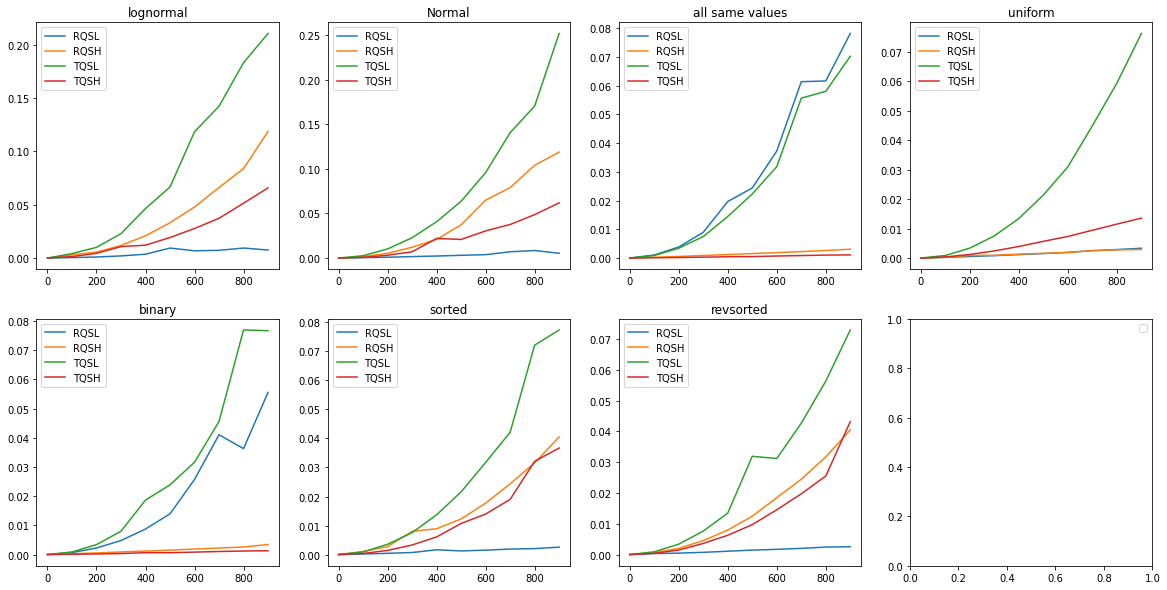

In [96]:
plotting(globalsizes,globaltimes)